# Chapter 2: End-to-End Machine Learning Project

Common data scientist workflow:
1. Look at the big picture
2. Get the data
3. Discover and visualize the data to gain insights
4. Prapare the data for Machine Learning Algorithms
5. Select a model and train it
6. Fine-tune the model
7. Present the solution
8. Launch, monitor, and maintain the system

---

## Look at the Big Picture

Assume we have metrics such as the population, median income, median housing price, and etc. 

### Frame the Problem

- Questions to ask:
    - What exactly is the bussiness objective?
    - How does the company expect to use the benefit from this model?
    - What is the current solution looks like? to give insights on how to solve them
    - Frame the problem, is it supervised, unsupervised, or reinforcement learning?or others?
- Pipelines: A sequence of data processing components
    - Make the architecture quite robut

### Select a Performance Measure

- Typical performance measure for regression problems is the Root Mean Square Error, measures the standard deviation of the errors the system makes in its predictions.
- Mean Absolute Error (Average Absolute Deviation)

### Check the Assumptions

- It is a good practice to list and verify the assumptions that were made so far

----

## Get the Data

### Create the Workspace

- Set up the essential tools to help us solve the machine learning problem

### Download the Data

- Take from any sources

In [1]:
import pandas as pd
housing = pd.read_csv('housing.csv')

### Take a Quick Look at the Data Structure

- dataset.head(): returns five data points on top
- dataset.info(): returns the information like range index, data columns, number of nonnull values, data type, and memory usage
- dataset.value_counts(): returns the number of dictinct values
- dataset.describe(): returns summary statistics
- dataset.hist(): returns histogram figure

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

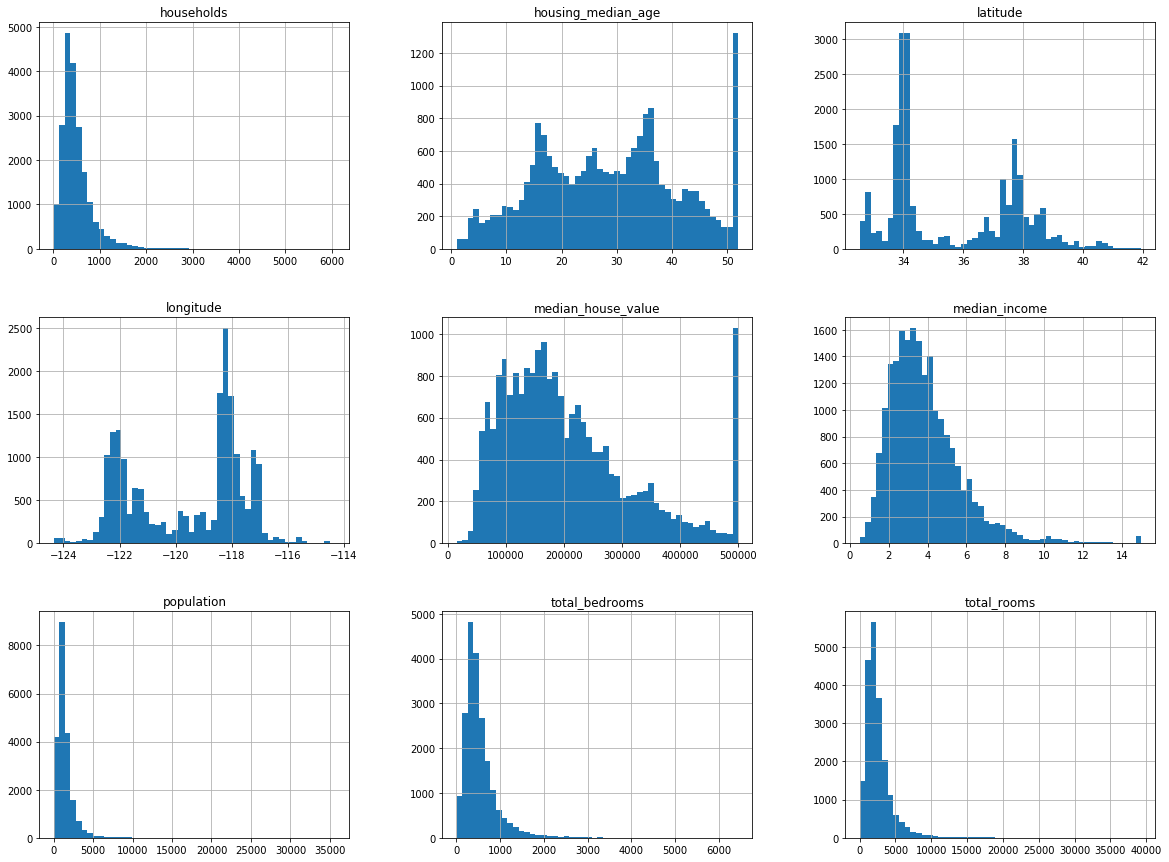

In [7]:
housing.hist(bins=50, figsize=(20, 15));

In [8]:
import numpy as np

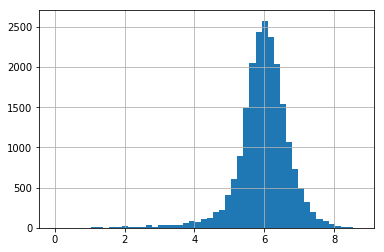

In [9]:
np.log(housing['households']).hist(bins=50)

### Create Test Set

Put it aside and never look at it

In [10]:
def split_train_test(data, test_ratio=0.2, random_state=0):
    """
    Splitting the data into training set and test set
    Parameters:
    - data: the data
    - test_ration: ratio of test set compare to the whole dataseet
    
    returns:
    train set, test set
    """
    
    rng = np.random.RandomState(seed=random_state)
    shuffled_indices = rng.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices] 

In [11]:
train_set, test_set = split_train_test(housing, 0.2)

In [12]:
print(len(train_set))
print(len(test_set))

16512
4128


Stratified sampling: The population is divided into homogeneous subgroups called strata and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.

In [13]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [17]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

---

## Discover and Visualize the Data to Gain Insights

In [18]:
housing = strat_train_set.copy()

### Visualizing Geographical Data

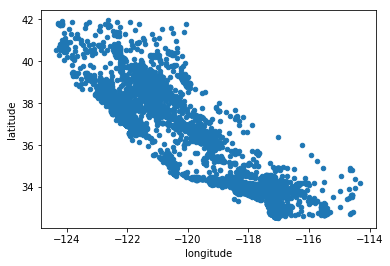

In [19]:
housing.plot.scatter(x='longitude', y='latitude', );

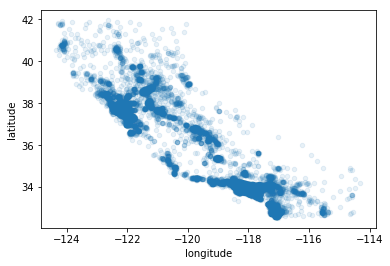

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

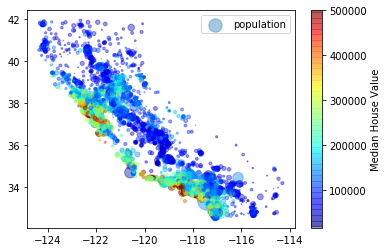

In [21]:
plt.scatter(x=housing['longitude'], y=housing['latitude'], alpha=0.4, 
            s=housing['population']/100, label='population', c=housing['median_house_value'],
           cmap='jet')
plt.legend()
cbr = plt.colorbar()
cbr.set_label('Median House Value');

### Looking for Correlations

In [22]:
corr_matrix = housing.corr()

In [23]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

- Correlation coefficient ranges from -1 to 1. When it is close to 1, it means that there is a strong positive correlation
- When the coefficient is close to -1, it means that there is a strong negative correlation-
- When coefficient close to zero, it means that there is no linear correlation
- It only measures linear correlation, so non-linear correlation will completely missed

In [24]:
import seaborn as sns

In [25]:
attributes = ["median_house_value", "median_income", "total_rooms",
                "housing_median_age"]

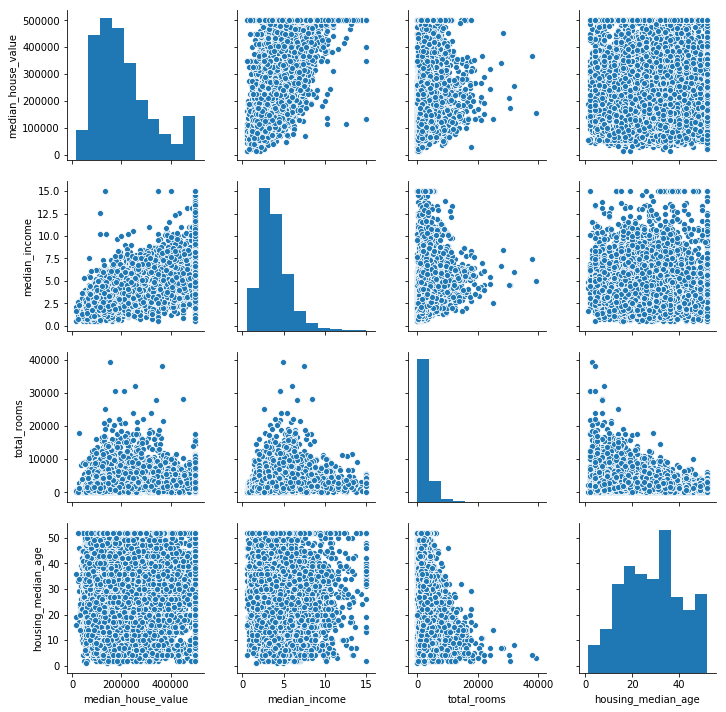

In [26]:
sns.pairplot(housing[attributes])

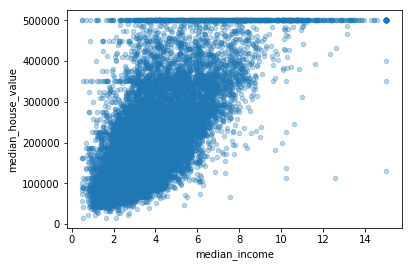

In [27]:
housing.plot.scatter(x='median_income', y='median_house_value', alpha=0.3);

### Experimenting with Attribute Combinations

In [28]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing["population_per_household"]=housing["population"]/housing["households"]

In [29]:
corr_matrix = housing.corr()

In [30]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

---

## Prepare the Data for Machine Learning Algorithms

In [31]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_lables = strat_train_set['median_house_value'].copy()

### Data Cleaning

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
imputer = SimpleImputer(strategy='median')

In [34]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [35]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [36]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [37]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [38]:
X = imputer.transform(housing_num)

In [39]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### Handling Text and Categorical Attributes

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [42]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [45]:
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [46]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [47]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

In [49]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Feature Scaling

Two common ways to get all attributes to have the same scale:
- min-max scaling: MinMaxScaler
- standardization: StandardScaler

### Transformation Pipelines

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

In [51]:
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


All but the last must be transformers (have fit_transform method)

You now have a pipeline for numerical values, and you also need to apply the LabelBi
narizer on the categorical values: how can you join these transformations into a single
pipeline? Scikit-Learn provides a FeatureUnion class for this. You give it a list of
transformers (which can be entire transformer pipelines), and when its transform()
method is called it runs each transformer’s transform() method in parallel, waits for
their output, and then concatenates them and returns the result (and of course calling
its fit() method calls all each transformer’s fit() method). A full pipeline handling
both numerical and categorical attributes may look like this:

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [53]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num.columns)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [55]:
# housing_prepared = full_pipeline.fit_transform(housing)

----

## Select and Train a Model

### Training and Evaluating on the Training Set

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(hou)